In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the housing dataset

df_housing = pd.read_csv('/Users/ayushyapare/Desktop/Ayushyas_Life/Work/Projects/Final_Project/Housing_Price_Prediction_Madrid/data/processed/merged_datasets.csv')
df_housing.head()

,Area,rooms,floor,price,elevator,exterior,district
0,64.0,2,3.0,85000,False,True,Villaverde 21
1,70.0,3,4.0,129900,True,True,Villaverde 21
2,94.0,2,1.0,144247,True,True,Villaverde 21
3,64.0,2,0.0,109900,True,True,Villaverde 21
4,108.0,2,4.0,260000,True,True,Villaverde 21


#### Basic Analysis

In [3]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26790 entries, 0 to 26789
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Area      26790 non-null  float64
 1   rooms     26790 non-null  int64  
 2   floor     26790 non-null  float64
 3   price     26790 non-null  int64  
 4   elevator  26790 non-null  bool   
 5   exterior  26790 non-null  bool   
 6   district  26790 non-null  object 
dtypes: bool(2), float64(2), int64(2), object(1)
memory usage: 1.1+ MB


<Axes: xlabel='elevator', ylabel='count'>

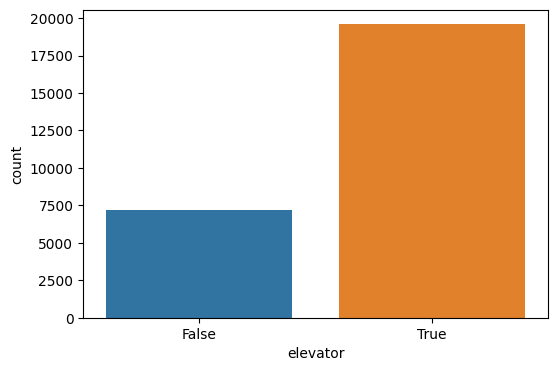

In [4]:
plt.figure(figsize=(6,4))
sns.countplot(x='elevator',data=df_housing)

<Axes: xlabel='exterior', ylabel='count'>

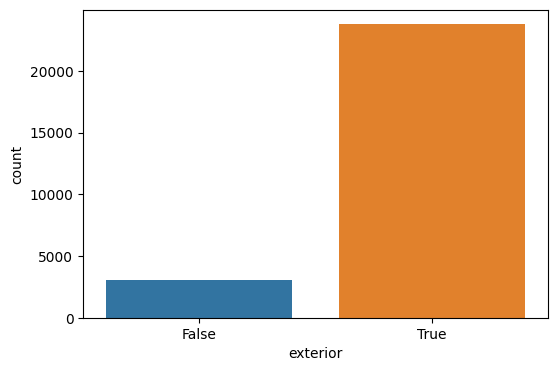

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x='exterior',data=df_housing)

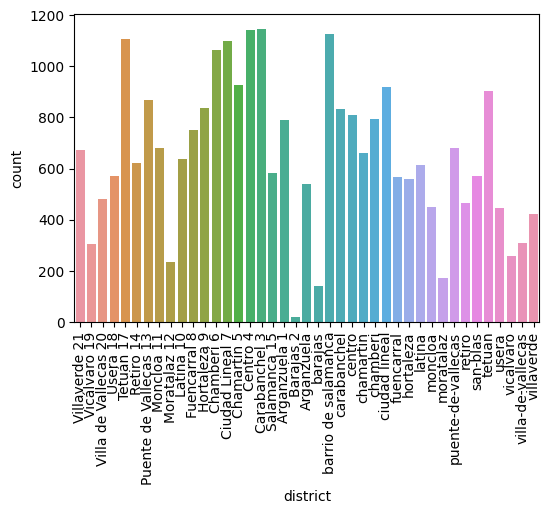

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x='district',data=df_housing)
plt.xticks(rotation = 90)
plt.show()

In [7]:
import pandas as pd
import unicodedata
import re

# Function to remove digits
def remove_digits(name):
    # Remove digits
    name = re.sub(r'\d+', '', name)
    # Remove hyphens
    name = re.sub(r'-', ' ', name)
    # Strip leading and trailing whitespaces
    name = name.strip()
    return name

# Function to remove accents
def remove_accents(name):
    nfkd_form = unicodedata.normalize('NFKD', name)
    return ''.join([c for c in nfkd_form if not unicodedata.combining(c)])

# Apply the functions
df_housing['district'] = df_housing['district'].apply(remove_digits)
df_housing['district'] = df_housing['district'].apply(remove_accents)




In [8]:
# Convert all district names to lowercase
df_housing['district'] = df_housing['district'].str.lower()

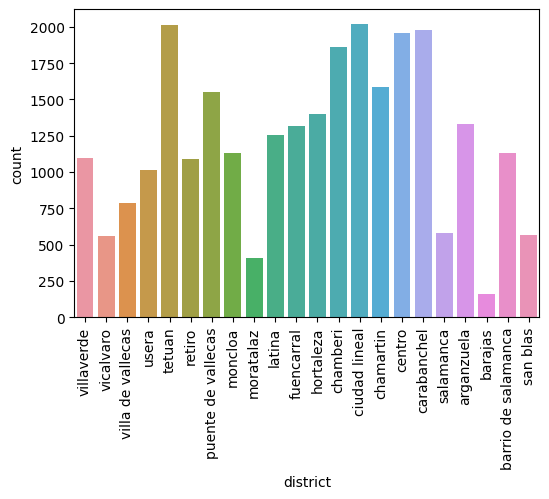

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x='district',data=df_housing)
plt.xticks(rotation = 90)
plt.show()

#### Advanced Analysis

<Axes: >

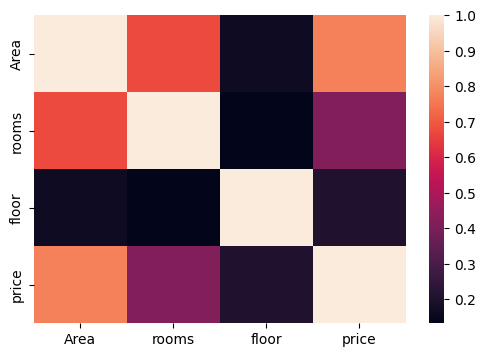

In [10]:
numeric_cols = df_housing.select_dtypes(include=['float64','int64']).columns
df_housing[numeric_cols].corr()
plt.figure(figsize=(6,4))
sns.heatmap(df_housing[numeric_cols].corr())

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


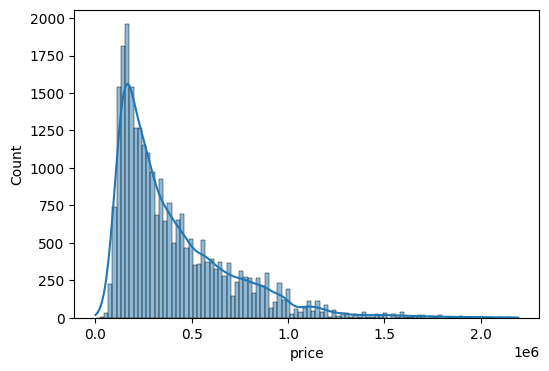

In [11]:
plt.figure(figsize=(6,4))
sns.histplot(df_housing['price'],bins=100, kde=True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


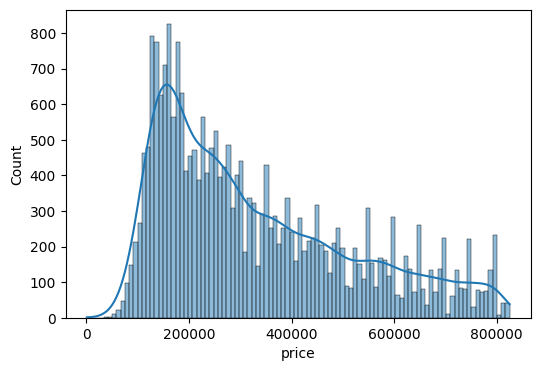

In [12]:
q = df_housing['price'].quantile(0.9)

df_housing = df_housing[df_housing['price']<q]

plt.figure(figsize=(6,4))
sns.histplot(df_housing['price'],bins=100, kde=True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


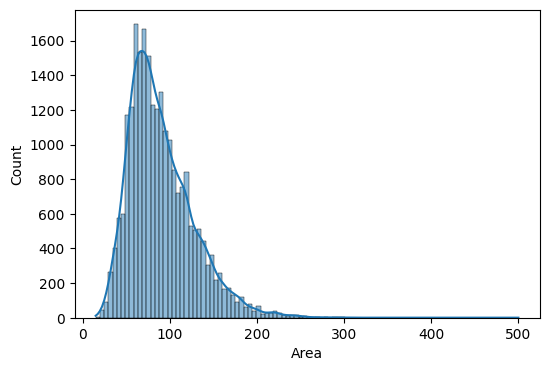

In [13]:
plt.figure(figsize=(6,4))
sns.histplot(df_housing['Area'],bins=100, kde=True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


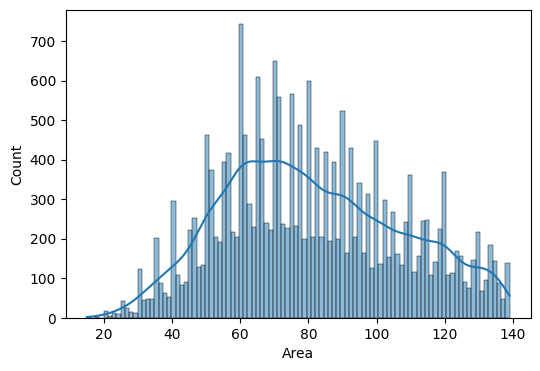

In [14]:
q = df_housing['Area'].quantile(0.9)

df_housing = df_housing[df_housing['Area']<q]

plt.figure(figsize=(6,4))
sns.histplot(df_housing['Area'],bins=100, kde=True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


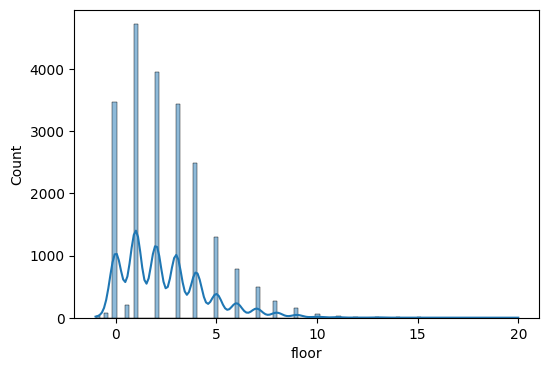

In [15]:
plt.figure(figsize=(6,4))
sns.histplot(df_housing['floor'],bins=100, kde=True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


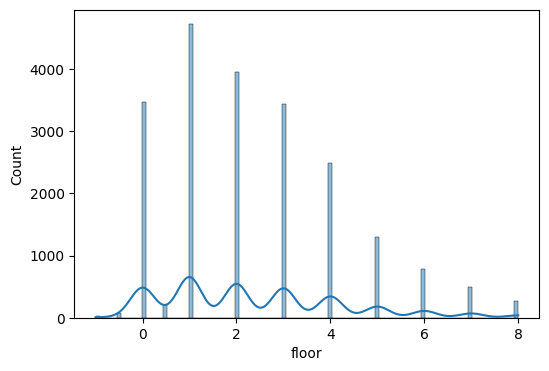

In [16]:
#q = df_housing['floor'].quantile(0.9)

df_housing = df_housing[df_housing['floor']<=8]

plt.figure(figsize=(6,4))
sns.histplot(df_housing['floor'],bins=100, kde=True)
plt.show()

In [17]:
df_housing['floor'].value_counts()

floor
 1.0    4720
 2.0    3950
 0.0    3469
 3.0    3436
 4.0    2487
 5.0    1298
 6.0     792
 7.0     500
 8.0     277
 0.5     212
-0.5      82
-1.0      34
Name: count, dtype: int64

In [18]:
# Mapping dictionary for floor numbers to words
floor_mapping = {
    0.5: 0.0,
    -0.5: -1.0,
}

# Convert floor values to words
df_housing['floor'] = df_housing['floor'].replace(floor_mapping)


In [19]:
df_housing['floor'].value_counts()

floor
 1.0    4720
 2.0    3950
 0.0    3681
 3.0    3436
 4.0    2487
 5.0    1298
 6.0     792
 7.0     500
 8.0     277
-1.0     116
Name: count, dtype: int64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


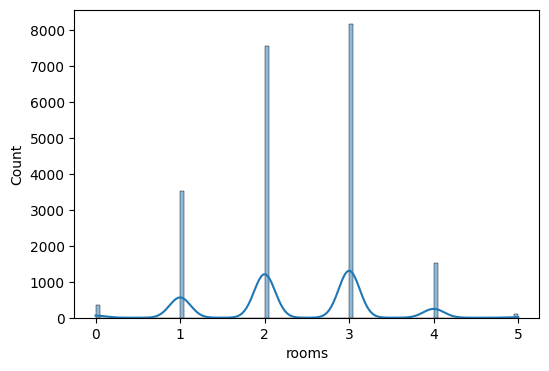

In [20]:
#q = df_housing['rooms'].quantile(0.9)

df_housing = df_housing[df_housing['rooms']<6]

plt.figure(figsize=(6,4))
sns.histplot(df_housing['rooms'],bins=100, kde=True)
plt.show()

In [21]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21246 entries, 0 to 26789
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Area      21246 non-null  float64
 1   rooms     21246 non-null  int64  
 2   floor     21246 non-null  float64
 3   price     21246 non-null  int64  
 4   elevator  21246 non-null  bool   
 5   exterior  21246 non-null  bool   
 6   district  21246 non-null  object 
dtypes: bool(2), float64(2), int64(2), object(1)
memory usage: 1.0+ MB


In [22]:
df_housing.isna().sum()

Area        0
rooms       0
floor       0
price       0
elevator    0
exterior    0
district    0
dtype: int64

#### Visualizing each feature vs price

In [23]:
df_housing.drop(df_housing[(df_housing['Area'] == 60) & (df_housing['price'] < 1000)].index, inplace=True)

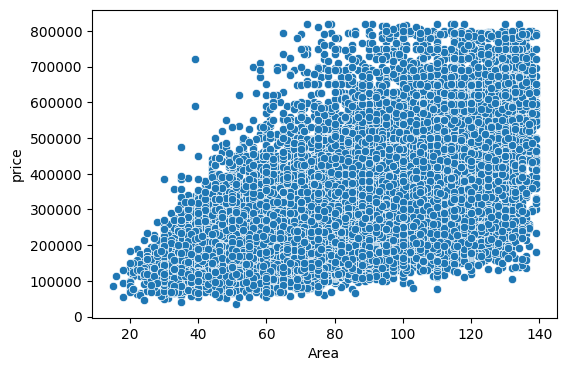

In [24]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x = 'Area',
    y = 'price',
    data= df_housing)
plt.show()

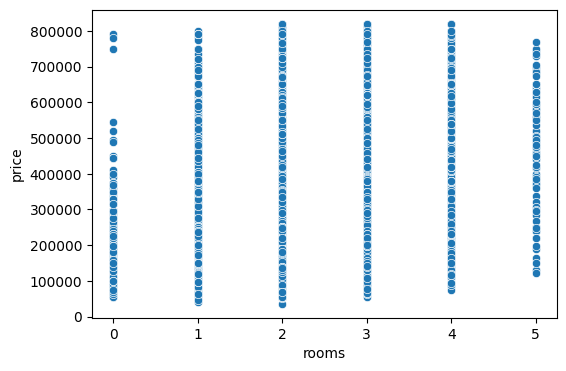

In [25]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x = 'rooms',
    y = 'price',
    data= df_housing)
plt.show()

In [26]:
df_housing['rooms'].replace(0,1,inplace=True)

In [27]:
df_housing['rooms'].value_counts()

rooms
3    8166
2    7561
1    3892
4    1536
5      90
Name: count, dtype: int64

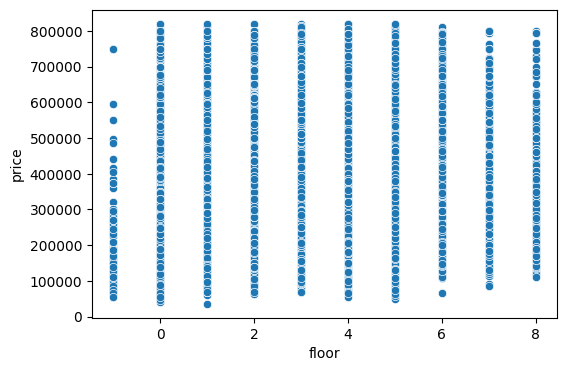

In [28]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x = 'floor',
    y = 'price',
    data= df_housing)
plt.show()

In [29]:
df = df_housing

# Function to calculate the ratio between each pair of numerical columns
def calculate_ratios(df):
    ratios = {}
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for i, col1 in enumerate(numerical_columns):
        for col2 in numerical_columns[i+1:]:
            ratio_col_name = f"{col1}/{col2}"
            ratios[ratio_col_name] = df[col1] / df[col2]
    return pd.DataFrame(ratios)

# Calculate ratios
ratios_df = calculate_ratios(df)

# Print the resulting DataFrame with ratios
ratios_df

,Area/rooms,Area/floor,Area/price,rooms/floor,rooms/price,floor/price
0,32.000000,21.333333,0.000753,0.666667,0.000024,0.000035
1,23.333333,17.500000,0.000539,0.750000,0.000023,0.000031
2,47.000000,94.000000,0.000652,2.000000,0.000014,0.000007
3,32.000000,inf,0.000582,inf,0.000018,0.000000
4,54.000000,27.000000,0.000415,0.500000,0.000008,0.000015
...,...,...,...,...,...,...
26785,30.000000,18.000000,0.000237,0.600000,0.000008,0.000013
26786,20.000000,20.000000,0.000556,1.000000,0.000028,0.000028
26787,32.500000,inf,0.000464,inf,0.000014,0.000000
26788,35.500000,71.000000,0.000526,2.000000,0.000015,0.000007


In [30]:
#df_normalized = df_housing.to_csv('/Users/ayushyapare/Desktop/Ayushyas_Life/Work/Projects/Final_Project/Housing_Price_Prediction_Madrid/data/processed/df_normalized.csv')

In [31]:
from pycaret.regression import *

In [32]:
# Setup the environment in PyCaret
regression_setup = setup(
    data=df_housing,
    #test_data=test_data,
    target = 'price',
    session_id=9,
    ignore_features=[],
    numeric_imputation = 'mean',
    categorical_imputation = 'mode',
    remove_multicollinearity=True,
    multicollinearity_threshold = 0.9,
    transformation= True,
    transformation_method = 'yeo-johnson',
    normalize = True,
    normalize_method = 'zscore',
    #pca=True,
    #pca_components='mle',
    log_data=False,
    log_experiment=False
    )

,Description,Value
0,Session id,9
1,Target,price
2,Target type,Regression
3,Original data shape,"(21245, 7)"
4,Transformed data shape,"(21245, 28)"
5,Transformed train set shape,"(14871, 28)"
6,Transformed test set shape,"(6374, 28)"
7,Numeric features,3
8,Categorical features,1
9,Preprocess,True


In [33]:
best_models = compare_models(cross_validation=True,
                             n_select=3,
                             )

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,50739.9427,5211059983.1689,72163.6730,0.8034,0.2272,0.1838,0.3120
rf,Random Forest Regressor,53550.5928,5939716338.5010,77049.1640,0.7758,0.2431,0.1941,0.4040
knn,K Neighbors Regressor,54368.5696,5982637481.9625,77331.6032,0.7741,0.2441,0.1970,0.0620
gbr,Gradient Boosting Regressor,56039.3034,6118085849.0260,78190.3806,0.7692,0.2505,0.2092,0.1710
lasso,Lasso Regression,60429.2979,6580921730.1102,81103.6345,0.7517,0.3834,0.2399,0.1550
ridge,Ridge Regression,60428.9534,6580920510.8001,81103.6266,0.7517,0.3832,0.2398,0.0450
lar,Least Angle Regression,60429.5705,6580921849.1547,81103.6362,0.7517,0.3846,0.2399,0.0460
llar,Lasso Least Angle Regression,60429.2982,6580922092.9576,81103.6367,0.7517,0.3834,0.2399,0.0460
br,Bayesian Ridge,60423.7949,6580921898.5364,81103.6236,0.7517,0.3801,0.2398,0.0470
lr,Linear Regression,60434.1094,6581699520.7749,81108.4829,0.7516,0.3826,0.2399,0.3440


Processing:   0%|          | 0/79 [00:00<?, ?it/s]

In [34]:
# Create a LightGBM regressor model
'''lgbm = create_model('lightgbm')

# Define custom grid for tuning
custom_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 300, 500],
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 10, 20],
    'min_child_samples': [20, 50, 100]
}

# Tune the LightGBM regressor model with the custom grid
tuned_lgbm = tune_model(lgbm, custom_grid=custom_grid, optimize='MAE')'''

"lgbm = create_model('lightgbm')\n\n# Define custom grid for tuning\ncustom_grid = {\n    'learning_rate': [0.01, 0.1, 0.3],\n    'n_estimators': [100, 300, 500],\n    'num_leaves': [31, 50, 100],\n    'max_depth': [-1, 10, 20],\n    'min_child_samples': [20, 50, 100]\n}\n\n# Tune the LightGBM regressor model with the custom grid\ntuned_lgbm = tune_model(lgbm, custom_grid=custom_grid, optimize='MAE')"

In [35]:
best_model = stack_models(best_models, choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,50872.0675,5486542885.5831,74071.2015,0.7966,0.2304,0.1831
1,50868.3010,5106261989.4157,71458.1135,0.8145,0.2211,0.1799
2,49413.1828,4773090937.5658,69087.5599,0.8041,0.2256,0.1841
3,49470.5633,4835528992.5902,69537.9680,0.8065,0.2242,0.1825
4,49301.6072,5013494699.6733,70806.0358,0.8128,0.2228,0.1794
5,50937.2626,5400919624.0166,73490.9493,0.8011,0.2257,0.1816
6,51200.5414,5365049323.3256,73246.4970,0.8013,0.2266,0.1811
7,48438.7831,4997542225.6793,70693.2969,0.8065,0.2203,0.1744
8,51052.6363,5318080690.1204,72925.1719,0.8057,0.2317,0.1881


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [36]:
# ensemble with bagging
#ensemble_model(lgbm, method = 'Bagging')

In [37]:
# ensemble with boosting
#ensemble_model(lgbm, method = 'Boosting')

In [38]:
# blend top 3 models
# blend_models(best_models)

In [40]:
holdout_pred = predict_model(best_model)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,49182.5038,4887135924.0132,69908.0534,0.8142,0.2214,0.1777


In [41]:
# show predictions df
holdout_pred[['price','prediction_label']].head()

,price,prediction_label
24795,225000,199057.893058
7650,590000,628416.487848
11436,150000,134421.382342
26438,128000,115903.258451
17161,214000,141362.164795


In [42]:
holdout_pred['difference'] = abs(holdout_pred['price'] - holdout_pred['prediction_label'])
holdout_pred[['price','prediction_label','difference']].describe()

,price,prediction_label,difference
count,6374.000000,6374.000000,6374.000000
mean,294284.838720,293084.483876,49182.503784
std,162176.013408,146296.308687,49685.053470
min,47500.000000,80388.638864,22.365667
25%,165000.000000,173313.538683,14822.462382
50%,249000.000000,250252.743332,33811.213507
75%,390000.000000,392533.955022,66376.141900
max,820000.000000,723387.984078,446537.681634


<Axes: xlabel='difference'>

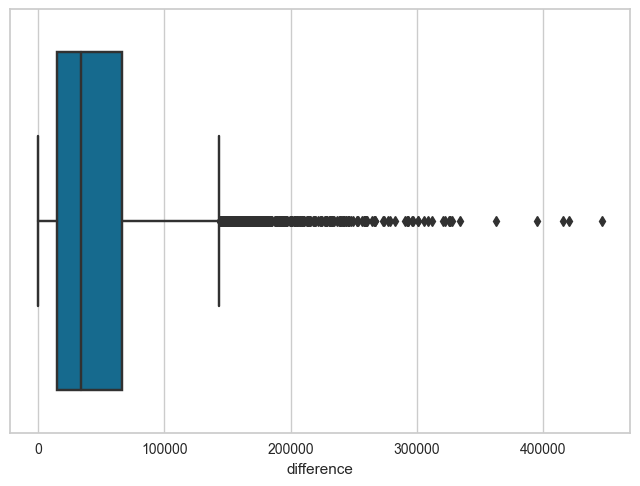

In [43]:
sns.boxplot(
    data=holdout_pred,
    x='difference'
)

In [44]:
holdout_pred['price'].describe()

count      6374.000000
mean     294284.838720
std      162176.013408
min       47500.000000
25%      165000.000000
50%      249000.000000
75%      390000.000000
max      820000.000000
Name: price, dtype: float64

In [45]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(holdout_pred['price'], holdout_pred['prediction_label'])

49182.50378430395

In [46]:
from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(holdout_pred['price'], holdout_pred['prediction_label']))
print(RMSE)

69908.05335591332


In [47]:
from sklearn.metrics import explained_variance_score
explained_variance_score(holdout_pred['price'], holdout_pred['prediction_label'])

0.8142104606533308

In [48]:
NRMSE = RMSE/(max(holdout_pred['price']) - min(holdout_pred['price']))
print('NRMSE: ', NRMSE)

NRMSE:  0.09049586194940236


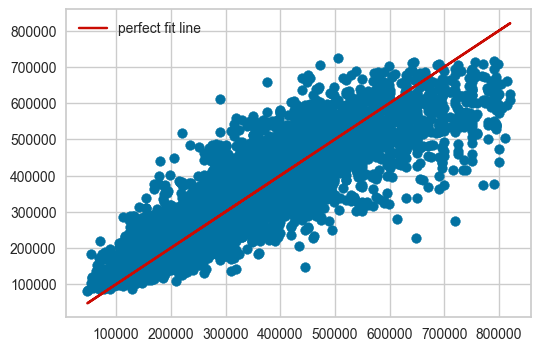

In [49]:
plt.figure(figsize=(6,4))

# Our predictions
plt.scatter(holdout_pred['price'], holdout_pred['prediction_label']);

# Perfect predictions
plt.plot(holdout_pred['price'], holdout_pred['price'], color='r', label='perfect fit line')
plt.legend()

In [50]:
q_big = holdout_pred['difference'].quantile(0.9)

big = holdout_pred[holdout_pred['difference']>q_big]

q_small = holdout_pred['difference'].quantile(0.1)

small = holdout_pred[holdout_pred['difference']<q_small]




In [51]:
big.head(10)

,Area,rooms,floor,elevator,exterior,district,price,prediction_label,difference
19823,95.0,2,3.0,False,True,ciudad lineal,440000,308554.609848,131445.390152
14394,70.0,2,5.0,True,True,moratalaz,367500,233191.113267,134308.886733
20716,121.0,3,3.0,True,True,fuencarral,711000,533722.292200,177277.707800
23021,84.0,2,3.0,True,True,puente de vallecas,445000,249421.329500,195578.670500
21412,72.0,2,0.0,False,True,hortaleza,340000,196454.014046,143545.985954
12434,116.0,3,1.0,False,True,centro,365000,497067.053378,132067.053378
11896,79.0,2,1.0,True,True,centro,315000,508171.265903,193171.265903
14919,66.0,1,7.0,True,True,arganzuela,485000,333861.466225,151138.533775
20609,120.0,3,3.0,True,True,fuencarral,360000,524990.652624,164990.652624
9817,110.0,3,6.0,True,True,chamartin,690000,539234.738195,150765.261805


In [52]:
small.head(10)

,Area,rooms,floor,elevator,exterior,district,price,prediction_label,difference
23194,50.0,2,1.0,False,True,puente de vallecas,121000,115954.023653,5045.976347
19935,75.0,2,1.0,False,True,ciudad lineal,197000,199893.896070,2893.896070
22696,63.0,3,3.0,False,True,moratalaz,145900,148426.114703,2526.114703
10844,91.0,3,4.0,True,True,carabanchel,220000,215618.341777,4381.658223
12105,85.0,2,0.0,True,True,centro,390000,393013.050300,3013.050300
468,92.0,3,1.0,False,True,villaverde,147000,152283.948654,5283.948654
22411,50.0,2,3.0,True,False,moncloa,260000,264304.672521,4304.672521
24917,72.0,2,1.0,False,True,tetuan,235000,230670.594845,4329.405155
1333,132.0,3,3.0,True,True,villa de vallecas,352800,347980.430005,4819.569995
17631,62.0,2,0.0,False,False,centro,288798,293392.318364,4594.318364


In [53]:
import sys
sys.path.append('/Users/ayushyapare/Desktop/Ayushyas_Life/Work/Projects/Snippets')

from DataFrame_Analysis import analyze_dataframe

In [54]:
analyze_dataframe(big)


The first column is not the index, it is: Area

1 duplicate rows found.



The first column is not the index, it is: Area

No duplicates found.

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 638 entries, 26438 to 9513
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Area              638 non-null    float32 
 1   rooms             638 non-null    int8    
 2   floor             638 non-null    float32 
 3   elevator          638 non-null    bool    
 4   exterior          638 non-null    bool    
 5   district          638 non-null    category
 6   price             638 non-null    int32   
 7   prediction_label  638 non-null    float64 
 8   difference        638 non-null    float64 
dtypes: bool(2), category(1), float32(2), float64(2), int32(1), int8(1)
memory usage: 25.6 KB

Columns and their Data Types:
Area                 float32
rooms                   int8
floor                float32
elevator                bool
exterior                bool
district   

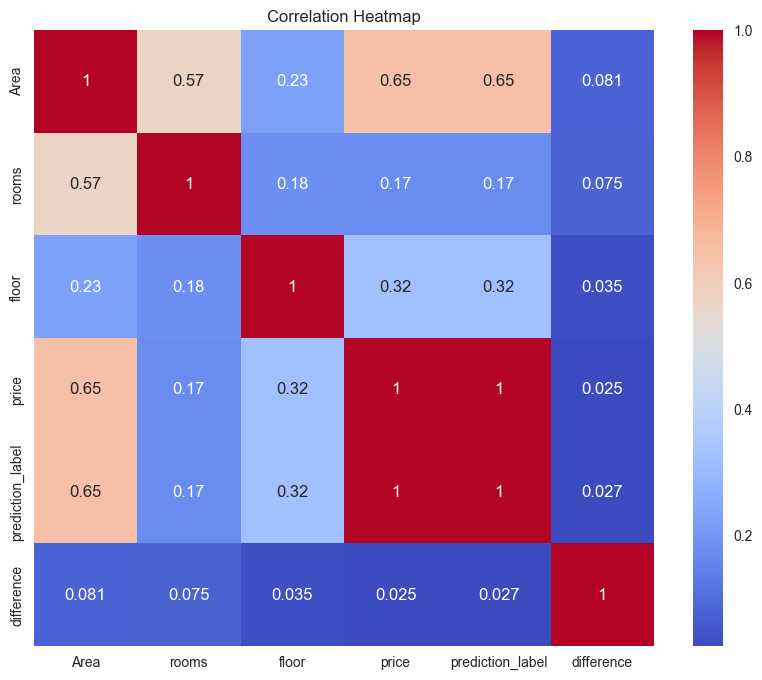

--------------------Numerical features -------------------------


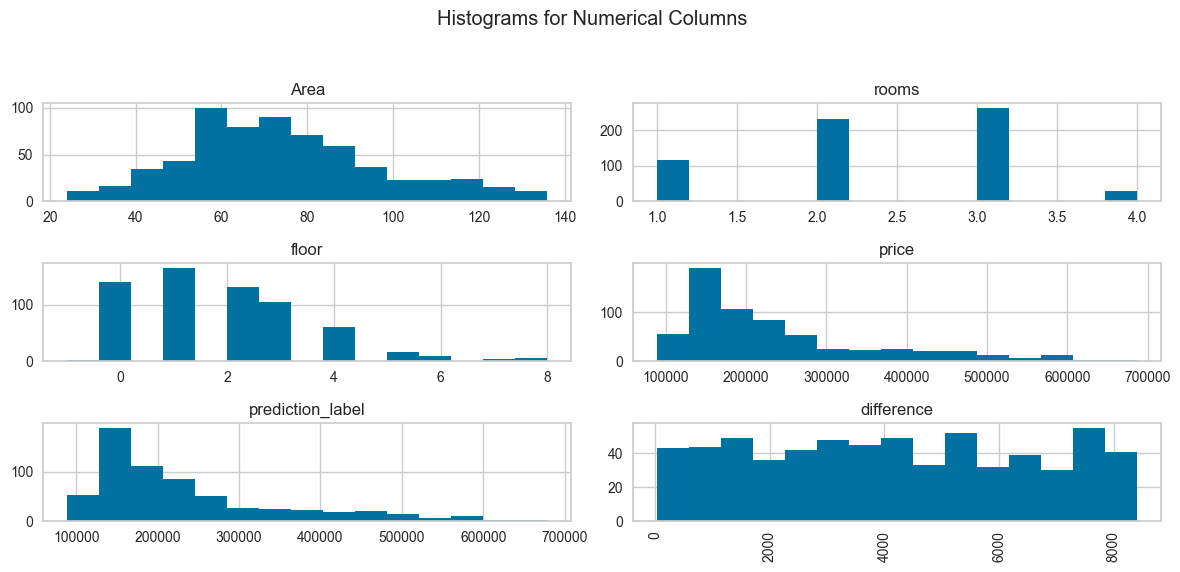

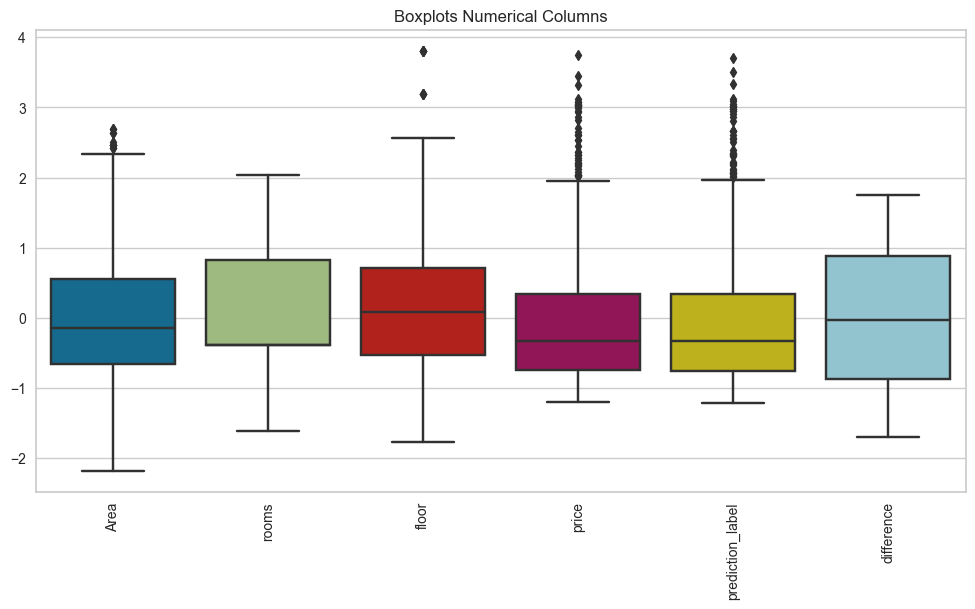

In [ ]:
analyze_dataframe(small)

<Axes: xlabel='difference', ylabel='Count'>

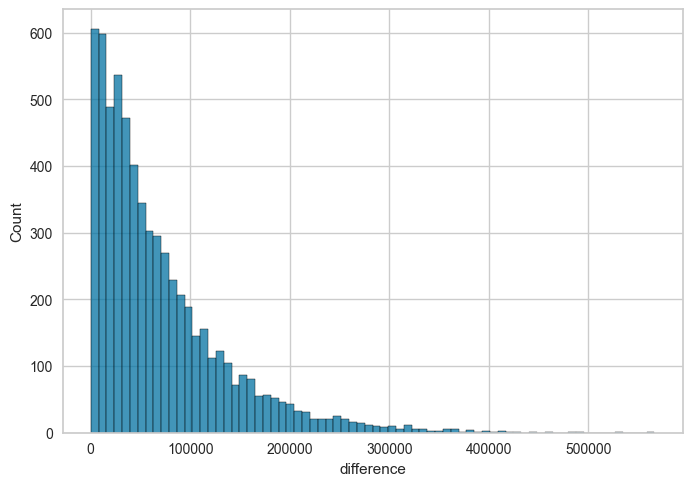

In [ ]:
sns.histplot(holdout_pred['difference'])